#  Projet 07: Implémentez un modèle de scoring

## Partie 02: Modélisation

Ce notebook présente un support ou je montre l'ensemble des étapes de nettoyage des données ainsi qu'une étude uni et multivariée. 

"- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -"

    Parcours : Data science.

    Réalisé par Karim Yahiatene.

    Date : 29/05/2021.

"- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -"

# I. Introduction

# I.1 Contexte du projet

## I.2 Problématique et objectifs

# II. Les librairies nécessaires

In [86]:
import pandas as pd
from zipfile import ZipFile
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from scipy import stats
import seaborn as sns
import matplotlib.patches as patches
import goslate
import plotly.graph_objs as go
import plotly.offline as py
from pattern.text.fr import singularize
import json
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
%matplotlib inline

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pickle

In [88]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)

# III. Prise en main des données 

## III.01 Lecture des données traitées

In [89]:
with open('/Users/Karim/Desktop/Data_Science/Projets/Projet_07/P7_Yahiatene_Karim/app_scoring/data/data_merge.pickle', 'rb') as handle:
    data_merge = pickle.load(handle)

In [92]:

with open('/Users/Karim/Desktop/Data_Science/Projets/Projet_07/P7_Yahiatene_Karim/app_scoring/data/data_appli.pickle', 'rb') as handle:
    data_appli = pickle.load(handle)

In [93]:
data_merge.shape

(46805, 207)

In [94]:
data_appli.shape

(46805, 53)

In [95]:
data_appli.head(4)

,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,CNT_CHILDREN,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Unknown,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,...,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Academic degree,DAYS_EMPLOYED,ORGANIZATION_TYPE_Business Entity,ORGANIZATION_TYPE_Education,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Health,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Bank and Insurance,ORGANIZATION_TYPE_Industry,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Service staff,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_HR staff
0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,121500.0,315000.0,16083.0,315000.0,42.852055,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-93.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,67500.0,337500.0,18846.0,337500.0,39.309589,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1233.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,202500.0,513531.0,22747.5,459000.0,61.800000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,365243.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,157500.0,270000.0,13500.0,270000.0,40.723288,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-579.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


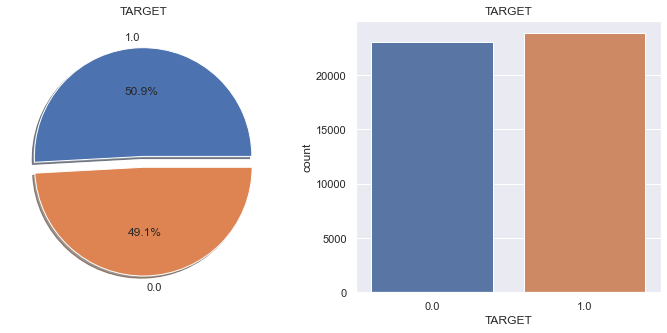

In [96]:
sns.set()
figure ,ax = plt.subplots(1, 2, figsize=(12,5))

data_appli['TARGET'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('TARGET')
ax[0].set_ylabel('')

sns.countplot(x='TARGET', data=data_appli, ax=ax[1])
ax[1].set_title('TARGET')

plt.show()

In [97]:
# temporary_zero=data_appli[data_appli.TARGET==0]
# temporary_one=data_appli[data_appli.TARGET==1]

In [98]:
# import random
# listIndexTemp=np.random.choice(temporary_zero.index,25000)

In [99]:
# temporary_zero=temporary_zero.loc[listIndexTemp]

In [100]:
# temporary=np.concatenate([temporary_zero,temporary_one])
# # random.shuffle(temporary)
# temporary=pd.DataFrame(temporary)

In [101]:
# temporary_zero.shape[0]+temporary_one.shape[0]

In [102]:
# temporary.columns=temporary_zero.columns

In [103]:
# temporary

In [104]:
# np.random.shuffle(temporary.values) 
# temporary

In [105]:
# sns.set()
# figure ,ax = plt.subplots(1, 2, figsize=(12,5))

# temporary['TARGET'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
# ax[0].set_title('TARGET')
# ax[0].set_ylabel('')

# sns.countplot(x='TARGET', data=temporary, ax=ax[1])
# ax[1].set_title('TARGET')

# plt.show()

In [106]:
# X=temporary.drop(['TARGET'], axis=1)
# y=temporary['TARGET']

X=data_appli.drop(['TARGET'], axis=1)
y=data_appli['TARGET']

In [107]:
X.shape

(46805, 52)

## mise à l'echelle

In [108]:
scaler = StandardScaler()

# data
X_scaled = scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled)
X_scaled.columns=X.columns


In [109]:
X_scaled_select=X_scaled.loc[:,:]
X_scaled_select.shape

(46805, 52)

In [110]:
X_scaled_select

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,CNT_CHILDREN,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Unknown,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_Municipal apartment,...,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Academic degree,DAYS_EMPLOYED,ORGANIZATION_TYPE_Business Entity,ORGANIZATION_TYPE_Education,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Health,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Bank and Insurance,ORGANIZATION_TYPE_Industry,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Service staff,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_HR staff
0,0.285651,-0.285651,0.780969,-0.780969,0.0,0.707186,-0.707186,-0.604158,0.674986,-0.674986,-0.536038,-0.717908,-0.817474,-0.599758,0.019923,-0.341289,0.771462,-0.267888,-0.431332,0.0,-0.216952,-0.061261,0.375575,-0.198133,-0.088899,...,-0.018492,-0.517769,-0.186668,-0.115579,0.590600,-0.405002,4.063285,-0.642238,-0.171744,-0.222138,-0.192593,-0.236286,-0.505369,-0.017905,-0.398890,-0.412675,-0.162213,-0.040594,-0.189045,-0.994312,-0.262674,-0.16483,-0.050274,-0.066973,1.383744
1,0.285651,-0.285651,0.780969,-0.780969,0.0,0.707186,-0.707186,0.768075,-1.481513,1.481513,-1.185948,-0.658306,-0.610828,-0.534239,-0.282409,-0.341289,0.771462,-0.267888,-0.431332,0.0,-0.216952,-0.061261,0.375575,-0.198133,-0.088899,...,-0.018492,-0.517769,-0.186668,-0.115579,0.590600,-0.413679,-0.246106,1.557056,-0.171744,-0.222138,-0.192593,-0.236286,-0.505369,-0.017905,-0.398890,-0.412675,-0.162213,-0.040594,-0.189045,1.005721,-0.262674,-0.16483,-0.050274,-0.066973,-0.722677
2,0.285651,-0.285651,0.780969,-0.780969,0.0,0.707186,-0.707186,-0.604158,0.674986,-0.674986,0.438828,-0.192006,-0.319033,-0.180435,1.637036,-0.341289,0.771462,-0.267888,-0.431332,0.0,-0.216952,-0.061261,0.375575,-0.198133,-0.088899,...,-0.018492,-0.517769,-0.186668,-0.115579,0.590600,2.375972,-0.246106,-0.642238,-0.171744,-0.222138,-0.192593,-0.236286,1.978752,-0.017905,-0.398890,-0.412675,-0.162213,-0.040594,-0.189045,1.005721,-0.262674,-0.16483,-0.050274,-0.066973,-0.722677
3,-3.500779,3.500779,-1.280460,1.280460,0.0,-1.414055,1.414055,-0.604158,0.674986,-0.674986,-0.102764,-0.837112,-1.010658,-0.730796,-0.161757,-0.341289,0.771462,-0.267888,-0.431332,0.0,-0.216952,-0.061261,0.375575,-0.198133,-0.088899,...,-0.018492,1.931364,-0.186668,-0.115579,-1.693193,-0.408701,-0.246106,1.557056,-0.171744,-0.222138,-0.192593,-0.236286,-0.505369,-0.017905,-0.398890,-0.412675,-0.162213,-0.040594,-0.189045,1.005721,-0.262674,-0.16483,-0.050274,-0.066973,-0.722677
4,0.285651,-0.285651,0.780969,-0.780969,0.0,-1.414055,1.414055,-0.604158,0.674986,-0.674986,0.168032,1.687382,1.855125,1.758933,1.013433,-0.341289,-1.296240,-0.267888,-0.431332,0.0,4.609308,-0.061261,0.375575,-0.198133,-0.088899,...,-0.018492,1.931364,-0.186668,-0.115579,-1.693193,-0.431834,-0.246106,-0.642238,5.822633,-0.222138,-0.192593,-0.236286,-0.505369,-0.017905,-0.398890,-0.412675,-0.162213,-0.040594,-0.189045,-0.994312,3.806995,-0.16483,-0.050274,-0.066973,-0.722677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46800,0.285651,-0.285651,-1.280460,1.280460,0.0,0.707186,-0

In [111]:
with open('/Users/Karim/Desktop/Data_Science/Projets/Projet_07/P7_Yahiatene_Karim/app_scoring/data/scaler.pickle', 'wb') as handle:
    pickle.dump(scaler, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

### Reduction des données (PCA)

In [112]:
#decomposition en ACP
n_comp=X_scaled_select.shape[1]
l_pca = PCA(n_components=n_comp,random_state=12)
print("done")
pca_result=l_pca.fit_transform(X_scaled_select)
print("done")
#transformation des composantes en df avec les noms des composantes comme nom de colonnes
df_l_PCA=pd.DataFrame()
for i in range(pca_result.shape[1]):
    df_l_PCA['pca_'+str(i+1)]=pca_result[:,i]

done
done


In [113]:
print(l_pca.explained_variance_ratio_)
print(l_pca.explained_variance_ratio_.sum())

[7.94676136e-02 6.51727244e-02 5.18676053e-02 4.94164272e-02
 4.30236848e-02 3.51856781e-02 3.27225277e-02 3.14150762e-02
 3.09790970e-02 2.89115521e-02 2.57901449e-02 2.40791243e-02
 2.34132892e-02 2.30368933e-02 2.24496373e-02 2.19496172e-02
 2.13857645e-02 2.13448845e-02 2.09957564e-02 2.08658328e-02
 2.06145185e-02 2.05277995e-02 2.04605248e-02 2.02319506e-02
 2.00948151e-02 1.99175018e-02 1.97899436e-02 1.96558080e-02
 1.93906465e-02 1.93542022e-02 1.92156925e-02 1.85218699e-02
 1.76960344e-02 1.73384834e-02 1.51672304e-02 1.26332496e-02
 8.77592087e-03 8.07374087e-03 5.43043339e-03 3.35805621e-03
 2.78647016e-04 1.86742703e-28 1.49752398e-28 7.46896438e-32
 6.30525580e-32 4.13344565e-32 3.73213303e-32 1.57114566e-32
 4.81453914e-33 1.36999884e-33 8.67703714e-34 3.26996601e-34]
0.9999999999999999


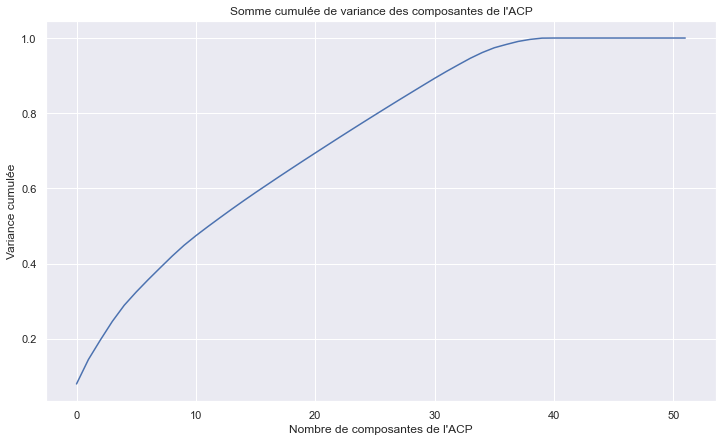

In [114]:
plt.figure(figsize=(12,7))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(n_comp)),np.cumsum(l_pca.explained_variance_ratio_))

Text(0.5, 1.0, 'Importance des features')

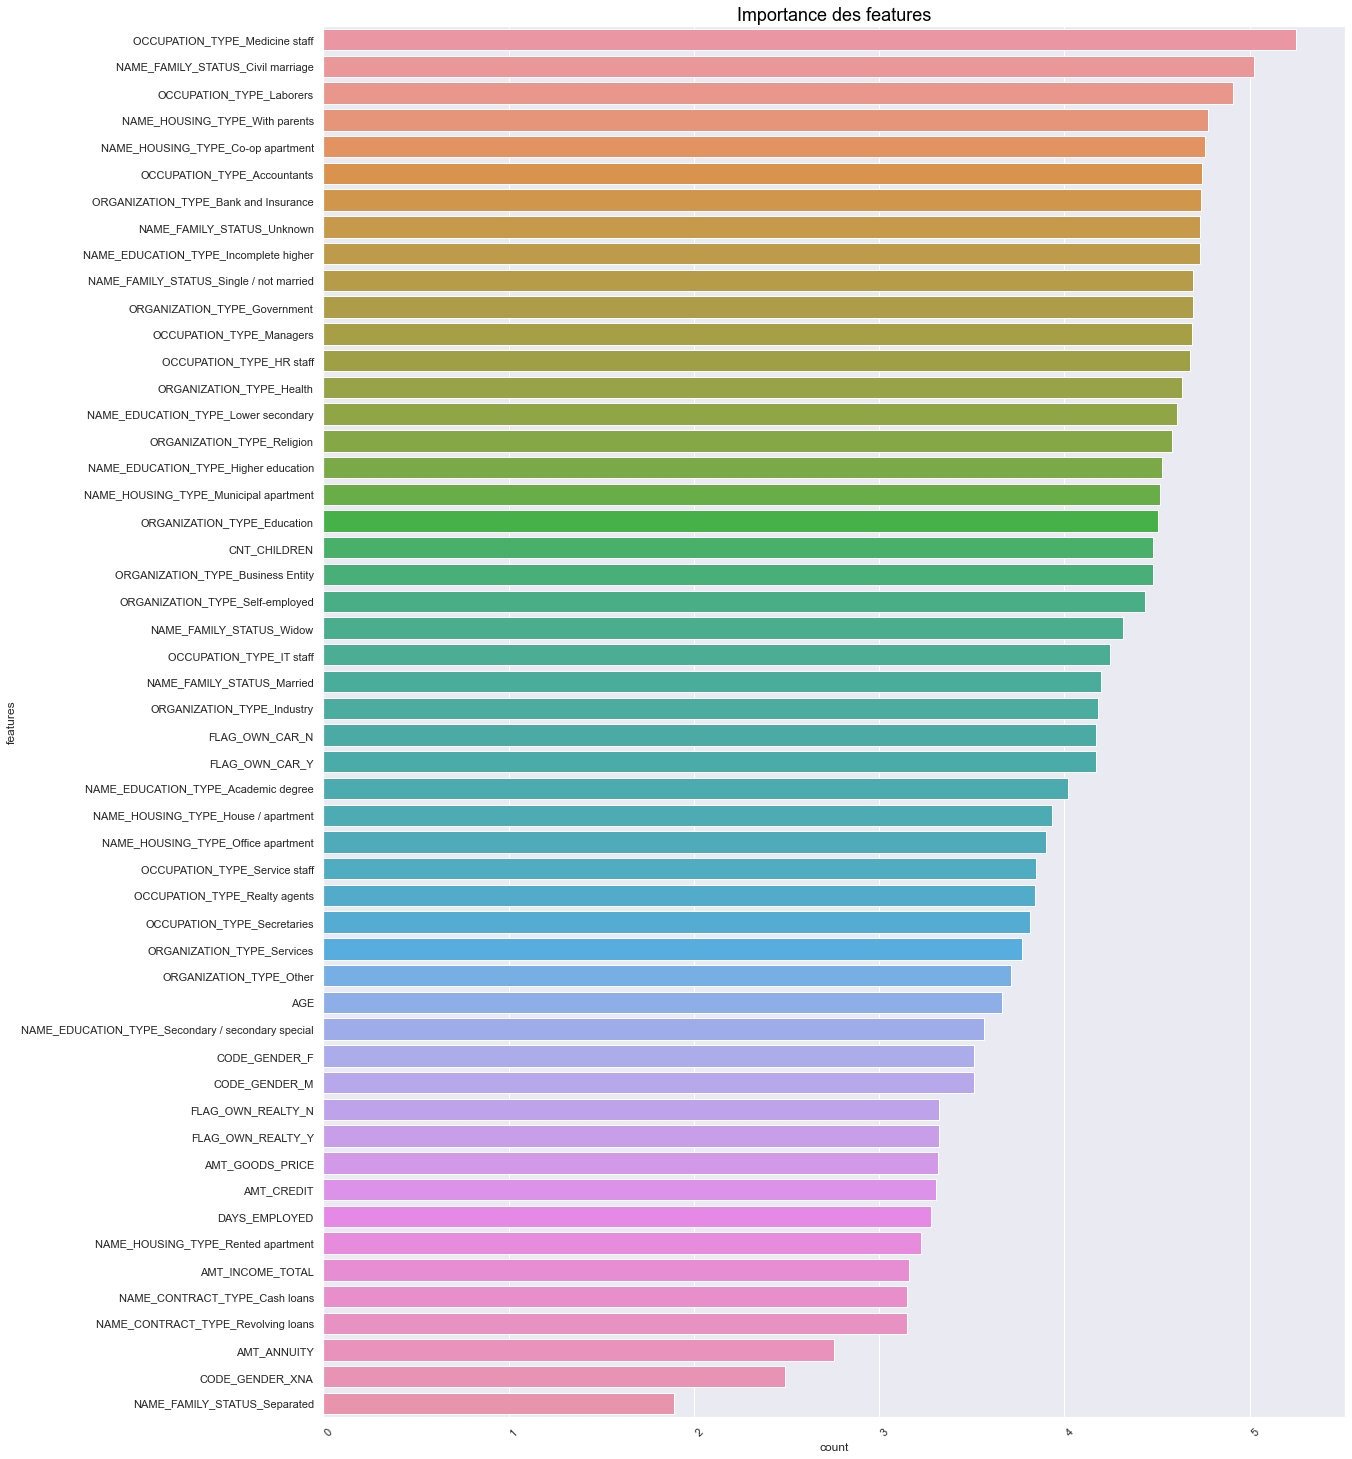

In [115]:
# Dump components relations with features:
df_importance=pd.DataFrame(abs(l_pca.components_),columns=X_scaled_select.columns)
df_importance=df_importance.sum(axis=0)
df_importance=pd.DataFrame({"features":X_scaled_select.columns.tolist(),"count":df_importance.values})
df_importance.sort_values("count", ascending=False, inplace=True)
df_importance=df_importance.iloc[:70]



sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(15, 20))
fig.tight_layout()

sns.barplot(x=df_importance['count'],
              y=df_importance['features'],
              data=df_importance,ax=ax)
sns.set(font_scale=1.5)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="left" )

ax.set_title("Importance des features", fontsize=18, color="Black")

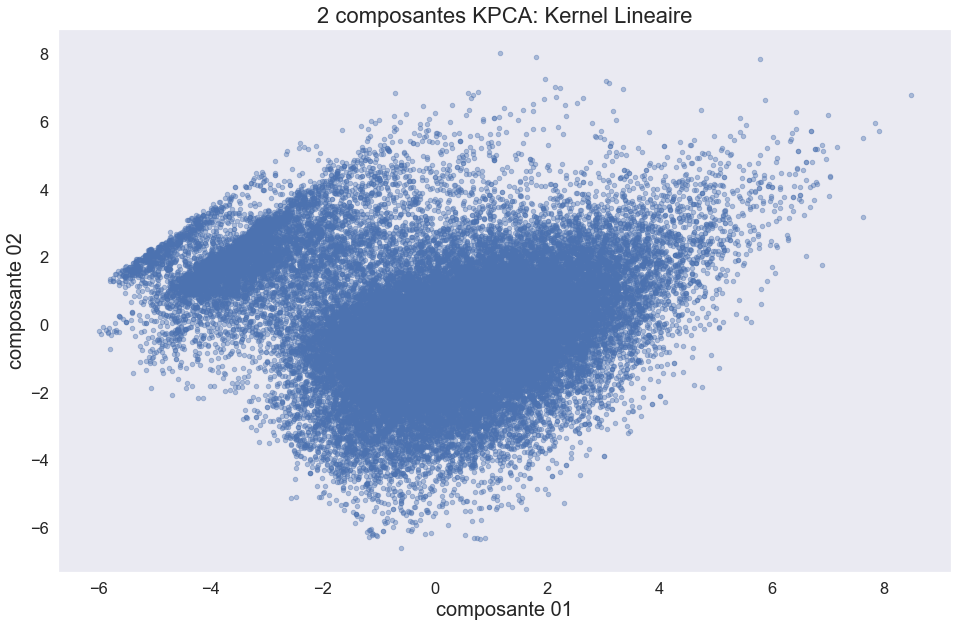

In [116]:
#affichage 2D
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=20)
ax.set_ylabel('Principal Component 2', fontsize=20)

ax.set_xlabel('composante 01', fontsize=20)
ax.set_ylabel('composante 02', fontsize=20)
ax.set_title('2 composantes KPCA: Kernel Lineaire', fontsize=22)

ax.scatter(df_l_PCA['pca_1'],
           df_l_PCA['pca_2'], s=20, alpha=0.4)
ax.grid()

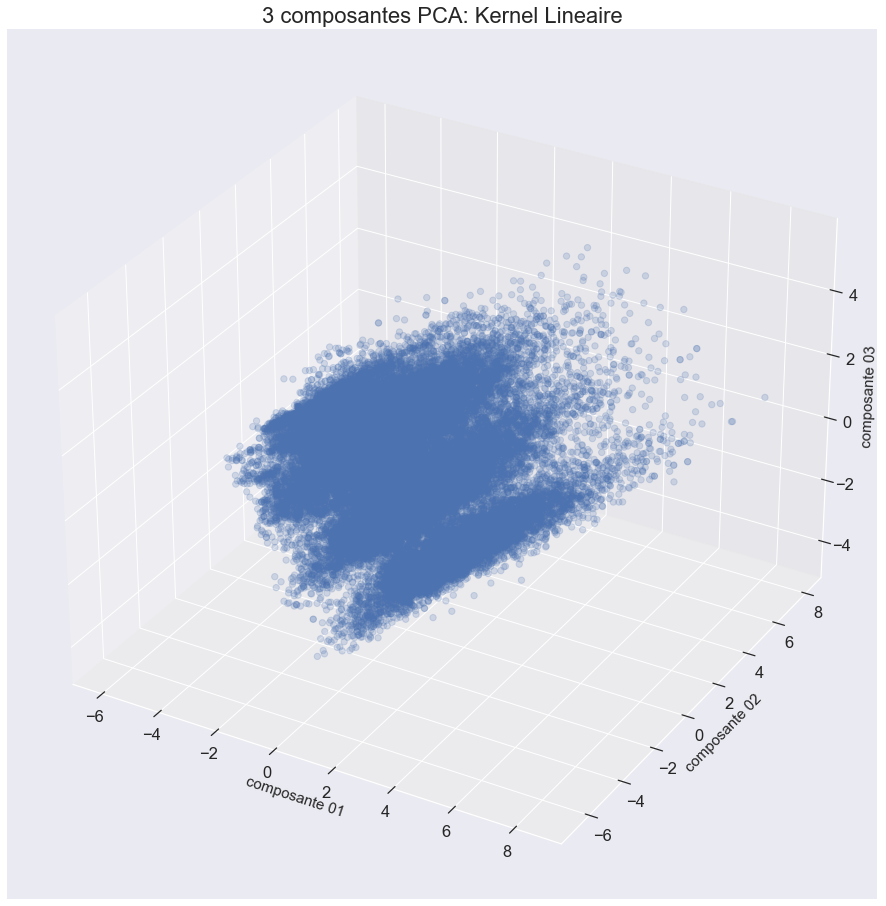

In [117]:
#affichage 3D

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('composante 01', fontsize=15)
ax.set_ylabel('composante 02', fontsize=15)
ax.set_zlabel('composante 03', fontsize=15)
ax.set_title('3 composantes PCA: Kernel Lineaire', fontsize=22)

ax.scatter(df_l_PCA['pca_1'], df_l_PCA['pca_2'],
           df_l_PCA['pca_3'], s=40, alpha=0.2)
ax.grid()

In [118]:
l_pca.explained_variance_ratio_[:35].sum()

0.9614499520489093

In [119]:
X_scaled.shape

(46805, 52)

## Correlation des features  

### IlI.01.01.04 test de Pearson¶

In [120]:
listCoeff=[]
for column in X_scaled.columns[:]:
    print('Corrélation de {} par rapport au {}'.format('TARGET',column))
    corr, _ = pearsonr(y, X_scaled[column])
    print(corr)
    listCoeff.append(corr)
    print('********************************************************************************************')

Corrélation de TARGET par rapport au NAME_CONTRACT_TYPE_Cash loans
0.055644169212621844
********************************************************************************************
Corrélation de TARGET par rapport au NAME_CONTRACT_TYPE_Revolving loans
-0.05564416921262182
********************************************************************************************
Corrélation de TARGET par rapport au CODE_GENDER_M
-0.09598493485892881
********************************************************************************************
Corrélation de TARGET par rapport au CODE_GENDER_F
0.09598493485892881
********************************************************************************************
Corrélation de TARGET par rapport au CODE_GENDER_XNA
nan
********************************************************************************************
Corrélation de TARGET par rapport au FLAG_OWN_CAR_N
0.03682287930685393
**********************************************************************************

C:\Users\Karim\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficent is not defined.



0.011386715877500786
********************************************************************************************
Corrélation de TARGET par rapport au NAME_HOUSING_TYPE_Municipal apartment
-0.010493082559176671
********************************************************************************************
Corrélation de TARGET par rapport au NAME_HOUSING_TYPE_Office apartment
0.02743873611925294
********************************************************************************************
Corrélation de TARGET par rapport au NAME_HOUSING_TYPE_Co-op apartment
0.049648915653553935
********************************************************************************************
Corrélation de TARGET par rapport au NAME_EDUCATION_TYPE_Secondary / secondary special
-0.009565552146891095
********************************************************************************************
Corrélation de TARGET par rapport au NAME_EDUCATION_TYPE_Higher education
-0.10242737408893023
*****************************

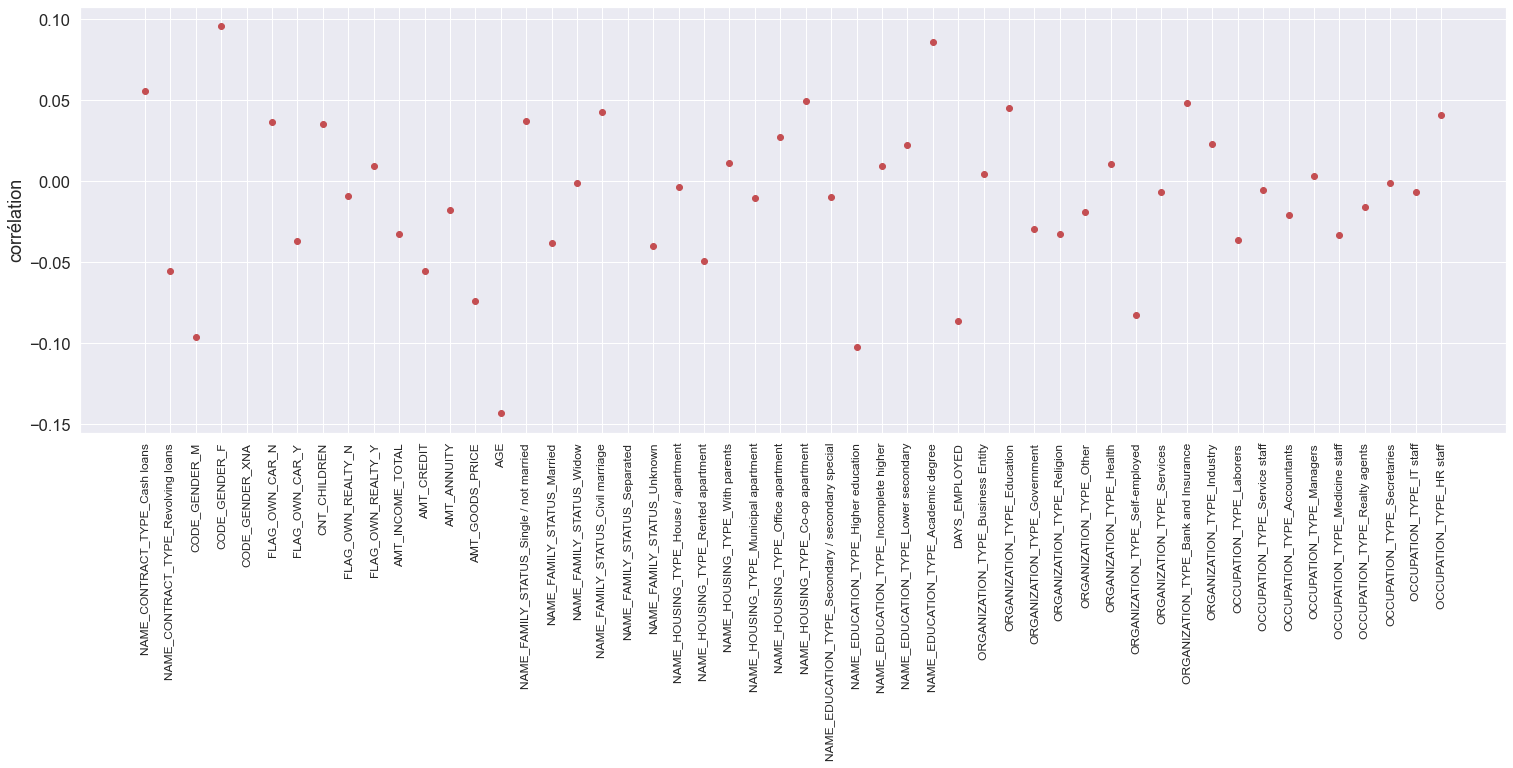

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(18,4))
plt.subplots_adjust(left=-0.2, bottom=-0.6, right=None, top=None, wspace=0.5, hspace=0.9)


ax.plot(listCoeff, 'ro')
ax.set_ylabel('corrélation')
ax.set_xticks(range(int(X_scaled.shape[1])))
ax.set_xticklabels(X_scaled.columns[:int(X_scaled.shape[1])].to_list() , fontsize=12)          
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

# ax[0].plot(listCoeff[:int(X_scaled.shape[1]/2)], 'ro')
# ax[0].set_ylabel('corrélation')
# ax[0].set_xticks(range(int(X_scaled.shape[1]/2)))
# ax[0].set_xticklabels(X_scaled.columns[:int(X_scaled.shape[1]/2)].to_list() , fontsize=12)          
# plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)

# # ax[0].set_title('Test de Pearson' )
# # ax[1].plot(listCoeff[int(X_scaled.shape[1]/2):], 'ro')
# # ax[1].set_ylabel('corrélation')
# # ax[1].set_xticks(range(1+int(X_scaled.shape[1]/2)))
# # ax[1].set_xticklabels(X_scaled.columns[int(X_scaled.shape[1]/2):].to_list() , fontsize=12 )          
# # plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)                 
plt.show()

# Modèlisation

### Creation d'un dataset d'entrainement et de test

In [122]:
# On split le jeu d'entrainement en entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.8,random_state=20)

In [123]:
X_train.shape

(9361, 52)

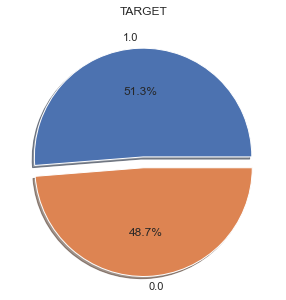

In [124]:
sns.set()
figure ,ax = plt.subplots(1, figsize=(12,5))

y_train.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax, shadow=True)
ax.set_title('TARGET')
ax.set_ylabel('')

# sns.countplot(x='TARGET', data=temporary, ax=ax[1])
# ax[1].set_title('TARGET')

plt.show()

## La baseline

In [125]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_train)
score_dum=dummy_clf.score(X_train, y_train)

In [126]:
# predict probabilities
dum_probs = dummy_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
dum_probs = dum_probs[:, 1]


In [127]:
dum_pred=dummy_clf.predict(X_test)
c_dm = confusion_matrix (y_test, dum_pred)
print ("Matrice de confusion / Dummy\n", c_dm)

Matrice de confusion / Dummy
 [[    0 18437]
 [    0 19007]]


Text(0.5, 1.0, 'Matrice de confusion [Model: DummyClassifier]')

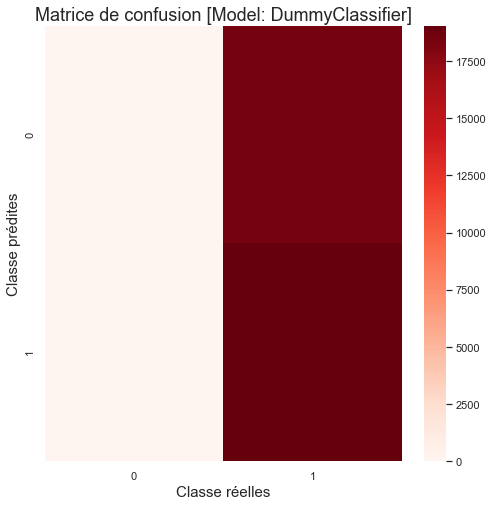

In [128]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(c_dm, ax = ax, cmap = 'Reds')
ax.set_xlabel('Classe réelles', fontsize=15)
ax.set_ylabel('Classe prédites', fontsize=15)
ax.set_title('Matrice de confusion [Model: DummyClassifier]', fontsize=18)

In [129]:
dum_precision, dum_recall, _ = precision_recall_curve(y_test, dum_probs)
dum_f1, dum_auc = f1_score(y_test, dum_pred), auc(dum_recall, dum_precision)
dum_acc =accuracy_score(y_test, dum_pred)
dum_pr, dum_reca = precision_score(y_test, dum_pred,zero_division=1), recall_score(y_test, dum_pred)

In [130]:
# summarize scores
print('Dummy: f1=%.3f auc=%.3f' % (dum_f1, dum_auc))
print('Dummy: Accurancy=%.3f ' % (dum_acc))
print('Dummy: precision=%.3f rappel=%.3f' % (dum_pr, dum_reca))


Dummy: f1=0.673 auc=0.754
Dummy: Accurancy=0.508 
Dummy: precision=0.508 rappel=1.000


Text(0.5, 1.0, 'ROC [Model: Baseline]')

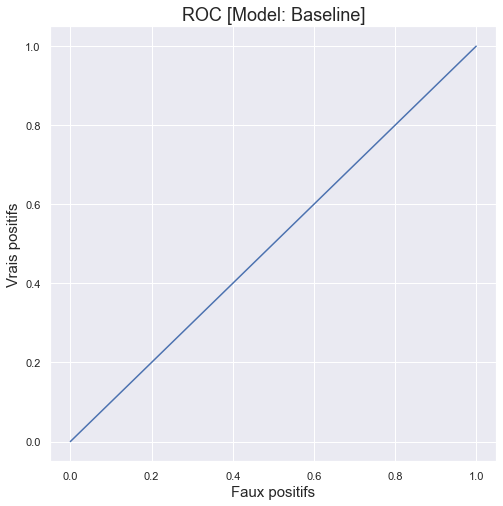

In [131]:
faux_positifs_dum, vrais_positifs_dum, seuil_dum = roc_curve(y_test, dum_probs)
fig, ax = plt.subplots(figsize = (8, 8))

ax.plot(faux_positifs_dum, vrais_positifs_dum)
ax.set_xlabel ("Faux positifs", fontsize=15)
ax.set_ylabel ("Vrais positifs", fontsize=15)
ax.set_title('ROC [Model: Baseline]', fontsize=18)

## LogisticRegression

In [132]:
LogisticReg_clf = LogisticRegression(random_state=0)
LogisticReg_clf.fit(X_train, y_train)
LogisticReg_clf.predict(X_train)
LogisticReg_clf.score(X_train, y_train)

0.6092297831428266

In [133]:
# predict probabilities
lr_probs = LogisticReg_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [134]:
LogisticReg_clf.score(X_test, y_test)

0.604208952035039

In [135]:
pred_lr=LogisticReg_clf.predict(X_test)
c_lr = confusion_matrix (y_test, pred_lr)
print ("Matrice de confusion / LogisticRegression\n", c_lr)

Matrice de confusion / LogisticRegression
 [[10258  8179]
 [ 6641 12366]]


Text(0.5, 1.0, 'Matrice de confusion [Model: LogisticReg_clf]')

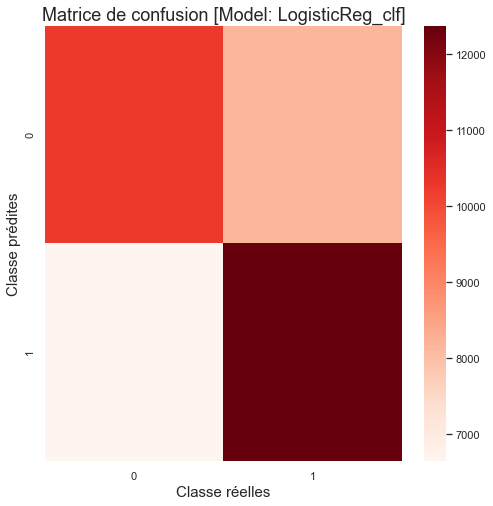

In [136]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(c_lr, ax = ax, cmap = 'Reds')
ax.set_xlabel('Classe réelles', fontsize=15)
ax.set_ylabel('Classe prédites', fontsize=15)
ax.set_title('Matrice de confusion [Model: LogisticReg_clf]', fontsize=18)

In [137]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, pred_lr), auc(lr_recall, lr_precision)
lr_acc =accuracy_score(y_test, pred_lr)
lr_pr, lr_reca = precision_score(y_test, pred_lr,zero_division=1), recall_score(y_test, pred_lr)

# summarize scores
print('LogisticRegression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('LogisticRegression: Accurancy=%.3f ' % (lr_acc))
print('LogisticRegression: precision=%.3f rappel=%.3f' % (lr_pr, lr_reca))


LogisticRegression: f1=0.625 auc=0.634
LogisticRegression: Accurancy=0.604 
LogisticRegression: precision=0.602 rappel=0.651


Text(0.5, 1.0, 'ROC [Model: LogisticRegression]')

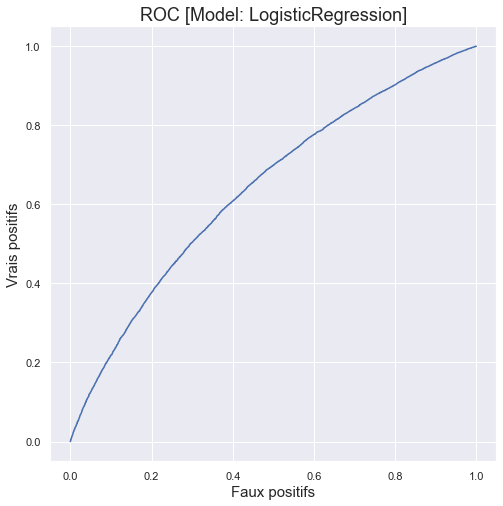

In [138]:
faux_positifs_rl, vrais_positifs_rl, seuil_rl = roc_curve(y_test, lr_probs)
fig, ax = plt.subplots(figsize = (8, 8))

ax.plot(faux_positifs_rl, vrais_positifs_rl)
ax.set_xlabel ("Faux positifs", fontsize=15)
ax.set_ylabel ("Vrais positifs", fontsize=15)
ax.set_title('ROC [Model: LogisticRegression]', fontsize=18)

## Random Forest

In [139]:
RandomForest_clf = RandomForestClassifier(max_depth=2, random_state=0)
RandomForest_clf.fit(X_train, y_train)
RandomForest_clf.predict(X_train)
RandomForest_clf.score(X_train, y_train)

0.6130755261190044

In [140]:
RandomForest_clf.score(X_test, y_test)

0.5999091977352847

In [141]:
# predict probabilities
rf_probs = RandomForest_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

In [142]:
pred_rf=RandomForest_clf.predict(X_test)
c_rf = confusion_matrix (y_test, pred_rf)
print ("Matrice de confusion / RandomForest\n", c_rf)

Matrice de confusion / RandomForest
 [[ 8760  9677]
 [ 5304 13703]]


Text(0.5, 1.0, 'Matrice de confusion [Model: RandomForestClassifier]')

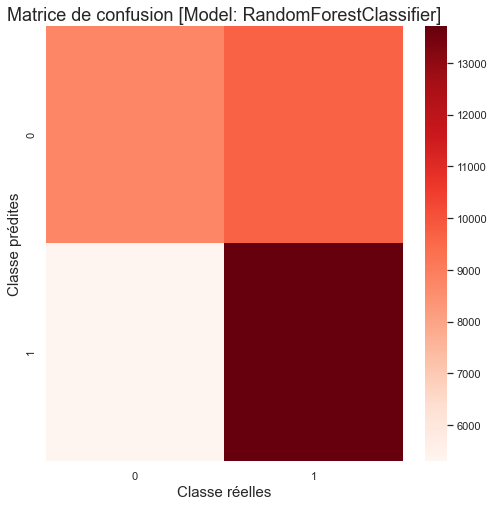

In [143]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(c_rf, ax = ax, cmap = 'Reds')
ax.set_xlabel('Classe réelles', fontsize=15)
ax.set_ylabel('Classe prédites', fontsize=15)
ax.set_title('Matrice de confusion [Model: RandomForestClassifier]', fontsize=18)

In [144]:
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, pred_rf), auc(rf_recall, rf_precision)
rf_acc =accuracy_score(y_test, pred_rf)
rf_pr, rf_reca = precision_score(y_test, pred_rf,zero_division=1), recall_score(y_test, pred_rf)

# summarize scores
print('RandomForestClassifier: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
print('RandomForestClassifier: Accurancy=%.3f ' % (rf_acc))
print('RandomForestClassifier: precision=%.3f rappel=%.3f' % (rf_pr, rf_reca))

RandomForestClassifier: f1=0.647 auc=0.628
RandomForestClassifier: Accurancy=0.600 
RandomForestClassifier: precision=0.586 rappel=0.721


Text(0.5, 1.0, 'ROC [Model: RandomForestClassifier]')

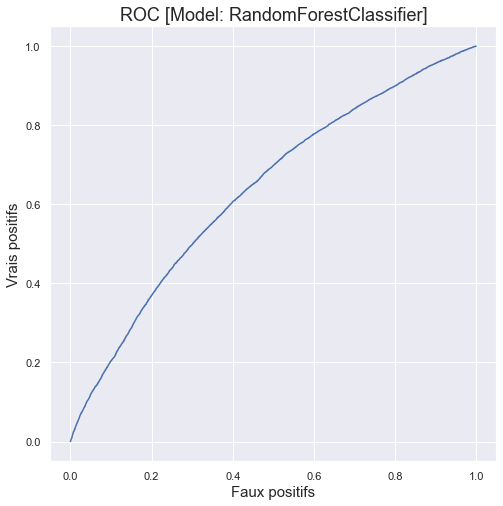

In [145]:
faux_positifs_rf, vrais_positifs_rf, seuil_rf = roc_curve(y_test, rf_probs)
fig, ax = plt.subplots(figsize = (8, 8))

ax.plot(faux_positifs_rf, vrais_positifs_rf)
ax.set_xlabel ("Faux positifs", fontsize=15)
ax.set_ylabel ("Vrais positifs", fontsize=15)
ax.set_title('ROC [Model: RandomForestClassifier]', fontsize=18)

##  GradientBoostingClassifier

In [146]:

GB_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0,verbose=True)
GB_clf.fit(X_train, y_train)
GB_clf.predict(X_train)
GB_clf.score(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3686            1.48s
         2           1.3537            1.27s
         3           1.3421            1.20s
         4           1.3357            1.17s
         5           1.3303            1.16s
         6           1.3249            1.36s
         7           1.3223            1.61s
         8           1.3190            1.75s
         9           1.3170            1.71s
        10           1.3148            1.69s
        20           1.3021            1.47s
        30           1.2947            1.12s
        40           1.2893            0.96s
        50           1.2857            1.32s
        60           1.2820            1.05s
        70           1.2788            0.77s
        80           1.2766            0.51s
        90           1.2745            0.27s
       100           1.2727            0.00s


0.635402200619592

In [147]:
X_train.shape

(9361, 52)

In [148]:
GB_clf.score(X_test, y_test)

0.6103781647259908

In [149]:
# predict probabilities
xgb_probs = GB_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]

In [150]:
pred_xgb=GB_clf.predict(X_test)
c_gb = confusion_matrix (y_test, pred_xgb)
print ("Matrice de confusion / GradientBoosting\n", c_gb)

Matrice de confusion / GradientBoosting
 [[10384  8053]
 [ 6536 12471]]


Text(0.5, 1.0, 'Matrice de confusion [Model: GradientBoostingClassifier]')

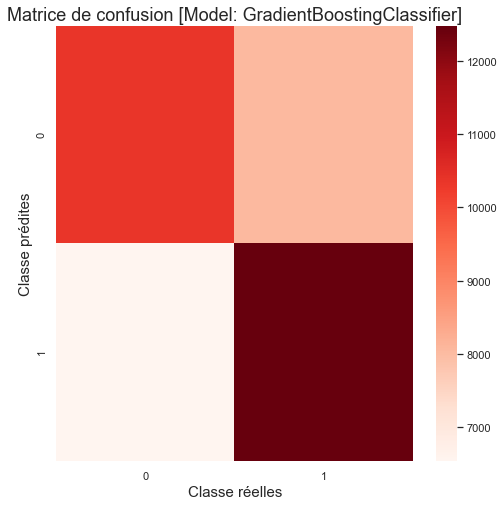

In [151]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(c_gb, ax = ax, cmap = 'Reds')
ax.set_xlabel('Classe réelles', fontsize=15)
ax.set_ylabel('Classe prédites', fontsize=15)
ax.set_title('Matrice de confusion [Model: GradientBoostingClassifier]', fontsize=18)

In [152]:
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
xgb_f1, xgb_auc = f1_score(y_test, pred_xgb), auc(xgb_recall, xgb_precision)
xgb_acc =accuracy_score(y_test, pred_xgb)
xgb_pr, xgb_reca = precision_score(y_test, pred_xgb,zero_division=1), recall_score(y_test, pred_xgb)

# summarize scores
print('GradientBoostingClassifier: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
print('GradientBoostingClassifier: Accurancy=%.3f ' % (xgb_acc))
print('GradientBoostingClassifier: precision=%.3f rappel=%.3f' % (xgb_pr, xgb_reca))

GradientBoostingClassifier: f1=0.631 auc=0.650
GradientBoostingClassifier: Accurancy=0.610 
GradientBoostingClassifier: precision=0.608 rappel=0.656


Text(0.5, 1.0, 'ROC [Model: GradientBoostingClassifier]')

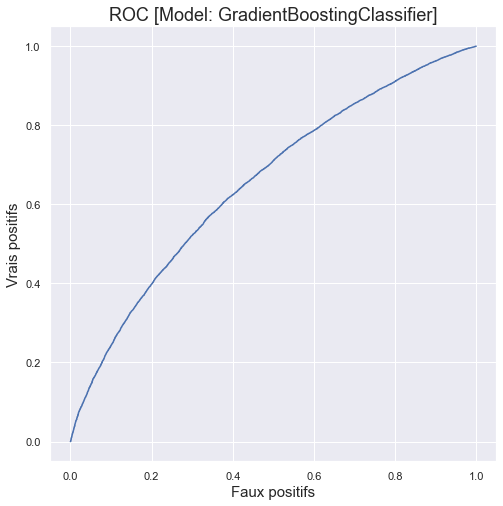

In [153]:
faux_positifs_xgb, vrais_positifs_xgb, seuil_xgb = roc_curve(y_test, xgb_probs)
fig, ax = plt.subplots(figsize = (8, 8))


ax.plot(faux_positifs_xgb, vrais_positifs_xgb)
ax.set_xlabel ("Faux positifs", fontsize=15)
ax.set_ylabel ("Vrais positifs", fontsize=15)
ax.set_title('ROC [Model: GradientBoostingClassifier]', fontsize=18)

# Résumé des scores

In [154]:
xgb_f1, xgb_auc
xgb_acc
xgb_pr, xgb_reca

(0.607630091600078, 0.6561266901667807)

In [155]:
df_metrics = pd.DataFrame(columns=["Accuracy","AUC","F1_score", "Precision", "Recall"], index=['Dummy',"Logistic regression", "Random Forest", "XGBoost"])
df_metrics["Accuracy"]=[dum_acc,lr_acc,rf_acc,xgb_acc]
df_metrics["AUC"]=[dum_auc,lr_auc,rf_auc,xgb_auc]
df_metrics["F1_score"]=[dum_f1,lr_f1,rf_f1,xgb_f1]
df_metrics["Precision"]=[dum_pr,lr_pr,rf_pr,xgb_pr]
df_metrics["Recall"]=[dum_reca,lr_reca,rf_reca,xgb_reca]



Text(0.5, 1.0, 'Comparaison temps modèlisation')

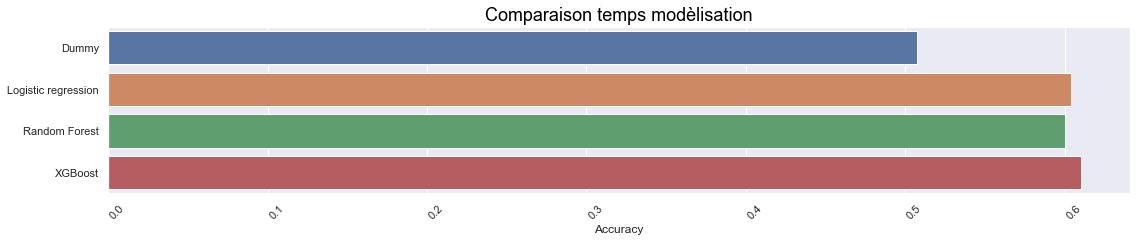

In [156]:
df=df_metrics

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(15, 3))
fig.tight_layout()

sns.barplot(x=df['Accuracy'],
              y=df.index,
              data=df,ax=ax)
sns.set(font_scale=1.5)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="left" )

ax.set_title("Comparaison temps modèlisation", fontsize=18, color="Black")

Text(0.5, 1.0, 'Comparaison temps modèlisation')

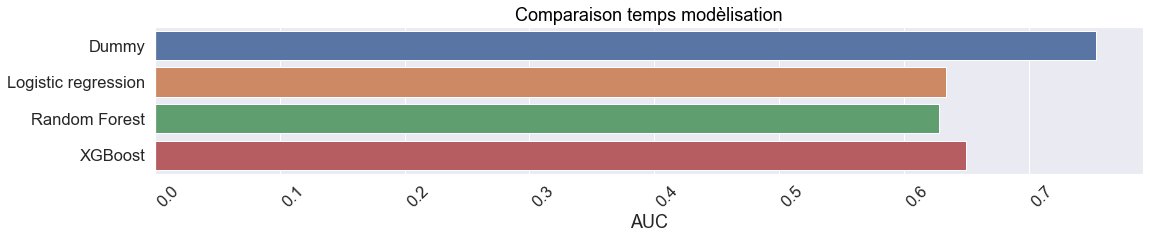

In [157]:
df=df_metrics

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(15, 3))
fig.tight_layout()

sns.barplot(x=df['AUC'],
              y=df.index,
              data=df,ax=ax)
sns.set(font_scale=1.5)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="left" )

ax.set_title("Comparaison temps modèlisation", fontsize=18, color="Black")

Text(0.5, 1.0, 'Comparaison temps modèlisation')

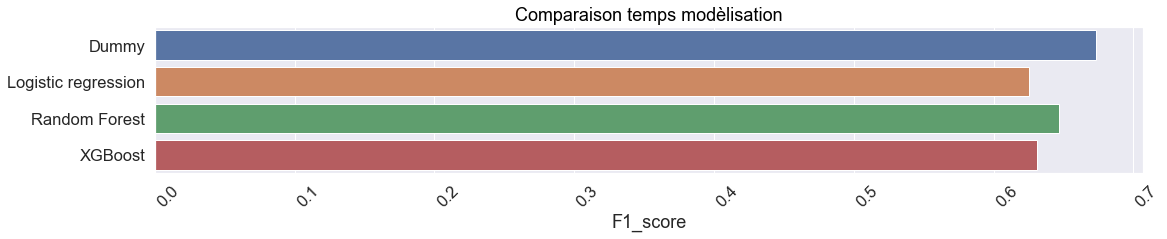

In [158]:
df=df_metrics

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(15, 3))
fig.tight_layout()

sns.barplot(x=df['F1_score'],
              y=df.index,
              data=df,ax=ax)
sns.set(font_scale=1.5)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="left" )

ax.set_title("Comparaison temps modèlisation", fontsize=18, color="Black")

Text(0.5, 1.0, 'Comparaison temps modèlisation')

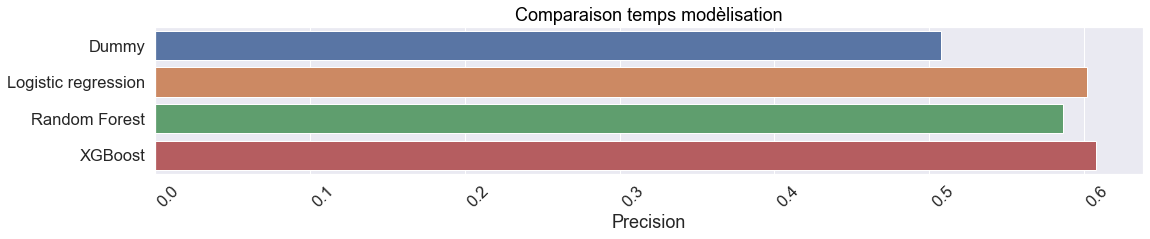

In [159]:
df=df_metrics

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(15, 3))
fig.tight_layout()

sns.barplot(x=df['Precision'],
              y=df.index,
              data=df,ax=ax)
sns.set(font_scale=1.5)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="left" )

ax.set_title("Comparaison temps modèlisation", fontsize=18, color="Black")

Text(0.5, 1.0, 'Comparaison temps modèlisation')

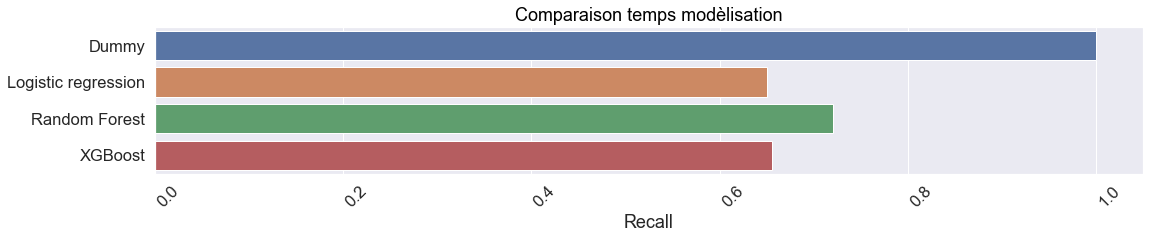

In [160]:
df=df_metrics

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(15, 3))
fig.tight_layout()

sns.barplot(x=df['Recall'],
              y=df.index,
              data=df,ax=ax)
sns.set(font_scale=1.5)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="left" )

ax.set_title("Comparaison temps modèlisation", fontsize=18, color="Black")

# Courbe de ROC

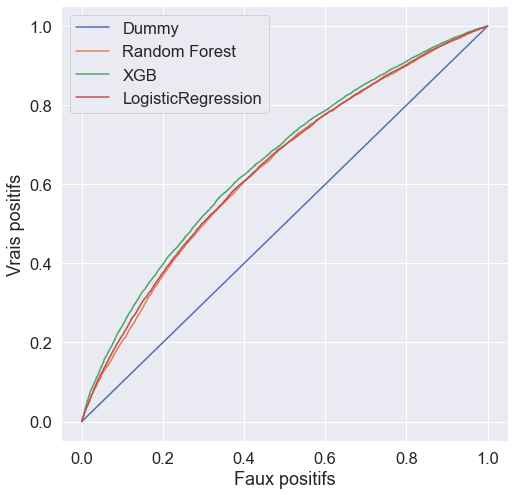

In [161]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.plot(faux_positifs_dum, vrais_positifs_dum, label="Dummy")
ax.plot(faux_positifs_rf, vrais_positifs_rf, label="Random Forest")
ax.plot(faux_positifs_xgb, vrais_positifs_xgb, label="XGB")
ax.plot(faux_positifs_rl, vrais_positifs_rl, label="LogisticRegression")



ax.set_xlabel ("Faux positifs")
ax.set_ylabel ("Vrais positifs")
plt.legend ()

# Amélioration des modeles

In [163]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [164]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [165]:
# my_scorer = make_scorer(mean_absolute_percentage_error)

my_scorer =auc

In [166]:
def algorithm_pipeline(X_train_data, y_train_data,model, 
                       param_grid, cv, scoring_fit=my_scorer,
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=-1 # affichage des differentres etapes du processus
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
   
    return fitted_model

In [167]:
def algorithm_pipeline_RandomGridSearch(X_train_data, y_train_data, 
                       model, param_distributions, cv, scoring_fit=my_scorer,
                       do_probabilities = False):

    
    gs = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid, 
        n_iter=100,
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=-1 # affichage des differentres etapes du processus
    )
    fitted_model = gs.fit(X_train_data, y_train_data)

    
    return fitted_model

In [168]:
from xgboost import XGBClassifier


In [169]:
xgb_model = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1)
# param_grid = {
#     'n_estimators':  [1000],
# #     'colsample_bytree': [0.1, 0.5],
#     'max_depth': [120],
# #     'reg_alpha': [0.5, 1.4],
#     'min_samples_leaf' : [5,10],
# #     'reg_lambda': [0.1,1.05 ,1.4],
# #     'subsample': [0.25, 0.75]
# }

param_grid = {
#         'min_child_weight': [1, 5, 10],
        'min_child_weight': [1, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
        'gamma': [0.5, 1,5,5],
#         'subsample': [0.6,1],
        'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 1.0],
#         'max_depth': [3, 5]
#         'max_depth': [3, 4, 5]
        }

In [ ]:
xgb_out_model_fld5_perf = algorithm_pipeline_RandomGridSearch(X_train, y_train,  xgb_model, param_grid, cv=5)

C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning:

The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.



In [ ]:
xgb_pred_fld5=xgb_out_model_fld5_perf.predict(X_test)
xgb_probs_am = xgb_out_model_fld5_perf.predict_proba(X_test)
xgb_probs_am=xgb_probs_am[:, 1]

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

faux_positifs_rl, vrais_positifs_rl, seuil_rl = roc_curve(y_test, dum_probs)
ax.plot(faux_positifs_rl, vrais_positifs_rl, label="Dummy")

faux_positifs_xgb, vrais_positifs_xgb, seuil_xgb = roc_curve(y_test, lr_probs)
ax.plot(faux_positifs_xgb, vrais_positifs_xgb, label="XGB")

faux_positifs_tr_am, vrais_positifs_tr_am, seuil_rf_am = roc_curve(y_test, xgb_probs_am)
ax.plot(faux_positifs_tr_am, vrais_positifs_tr_am, label="XGB Amélioré")


ax.set_xlabel ("Faux positifs")
ax.set_ylabel ("Vrais positifs")
plt.legend ()

In [ ]:
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
xgb_f1, xgb_auc = f1_score(y_test, pred_xgb), auc(xgb_recall, xgb_precision)
xgb_acc =accuracy_score(y_test, pred_xgb)
xgb_pr, xgb_reca = precision_score(y_test, pred_xgb,zero_division=1), recall_score(y_test, pred_xgb)

# summarize scores
print('GradientBoostingClassifier: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
print('GradientBoostingClassifier: Accurancy=%.3f ' % (xgb_acc))
print('GradientBoostingClassifier: precision=%.3f rappel=%.3f' % (xgb_pr, xgb_reca))

In [ ]:
xgb_precision_am, xgb_recall_am, _ = precision_recall_curve(y_test, xgb_probs_am)
xgb_f1_am, xgb_auc_am = f1_score(y_test, xgb_pred_fld5), auc(xgb_recall_am, xgb_precision_am)
xgb_acc_am =accuracy_score(y_test, xgb_pred_fld5)
xgb_pr_am, xgb_reca_am = precision_score(y_test, xgb_pred_fld5,zero_division=1), recall_score(y_test, xgb_pred_fld5)

# summarize scores
print('GradientBoostingClassifier amélioré: f1=%.3f auc=%.3f' % (xgb_f1_am, xgb_auc_am))
print('GradientBoostingClassifier amélioré: Accurancy=%.3f ' % (xgb_acc_am))
print('GradientBoostingClassifier amélioré: precision=%.3f rappel=%.3f' % (xgb_pr_am, xgb_reca_am))

In [162]:
with open('/Users/Karim/Desktop/Data_Science/Projets/Projet_07/P7_Yahiatene_Karim/app_scoring/data/XGB_clf.pickle', 'wb') as handle:
    pickle.dump(GB_clf, handle, protocol=pickle.HIGHEST_PROTOCOL)


# VII. Conclusion Partielle
